In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
data = pd.read_csv('Database/Madrid.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [5]:
data = data.dropna(axis=1, how='all')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
df = data[['id', 'subtitle', 'sq_mt_built', 'sq_mt_useful','n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'rent_price', 'buy_price', 'buy_price_by_area','built_year','parking_price']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   subtitle           21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   sq_mt_useful       8228 non-null   float64
 4   n_rooms            21742 non-null  int64  
 5   n_bathrooms        21726 non-null  float64
 6   n_floors           1437 non-null   float64
 7   sq_mt_allotment    1432 non-null   float64
 8   rent_price         21742 non-null  int64  
 9   buy_price          21742 non-null  int64  
 10  buy_price_by_area  21742 non-null  int64  
 11  built_year         10000 non-null  float64
 12  parking_price      7719 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.2+ MB


In [8]:
df = df.rename(columns={'subtitle':'city'})

In [9]:
df = df[['id', 'city','sq_mt_built','n_rooms','n_bathrooms','rent_price','buy_price', 'buy_price_by_area']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   city               21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21742 non-null  int64  
 4   n_bathrooms        21726 non-null  float64
 5   rent_price         21742 non-null  int64  
 6   buy_price          21742 non-null  int64  
 7   buy_price_by_area  21742 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [10]:
df['n_rooms'].describe()

count   21,742.00
mean         3.01
std          1.51
min          0.00
25%          2.00
50%          3.00
75%          4.00
max         24.00
Name: n_rooms, dtype: float64

In [11]:
df.drop(df.index[df['n_rooms'] == 0], axis=0, inplace = True)

In [12]:
df['n_bathrooms'].mode()

0   1.00
Name: n_bathrooms, dtype: float64

In [13]:
df['n_bathrooms'] = df['n_bathrooms'].fillna(1)
df['n_bathrooms'] = df['n_bathrooms'].replace(0,1)
df['n_bathrooms'] = df['n_bathrooms'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21303 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21303 non-null  int64  
 1   city               21303 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21303 non-null  int64  
 4   n_bathrooms        21303 non-null  int64  
 5   rent_price         21303 non-null  int64  
 6   buy_price          21303 non-null  int64  
 7   buy_price_by_area  21303 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB


In [15]:
df.dropna(subset=['sq_mt_built'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   city               21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  int64  
 5   rent_price         21177 non-null  int64  
 6   buy_price          21177 non-null  int64  
 7   buy_price_by_area  21177 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB


In [17]:
for value in df['rent_price']:
    if value < 0:
        df['rent_price'] = 0

In [18]:
df['district'] = df['city'].str.split(',', expand=True)[0]

In [19]:
df = df[['id', 'district', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'rent_price',
       'buy_price', 'buy_price_by_area']]

In [20]:
df.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
0,21742,San Cristóbal,64.00,2,1,0,85000,1328
1,21741,Los Ángeles,70.00,3,1,0,129900,1856
2,21740,San Andrés,94.00,2,2,0,144247,1535
3,21739,San Andrés,64.00,2,1,0,109900,1717
4,21738,Los Rosales,108.00,2,2,0,260000,2407


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   district           21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  int64  
 5   rent_price         21177 non-null  int64  
 6   buy_price          21177 non-null  int64  
 7   buy_price_by_area  21177 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB


In [22]:
df.to_csv('Database/Madrid_clean.csv', index=False)

In [23]:
df = pd.read_csv('Database/Madrid_clean.csv')
df.dropna(subset=['rent_price'], inplace=True)

In [24]:
df.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
0,21742,San Cristóbal,64.00,2,1,0,85000,1328
1,21741,Los Ángeles,70.00,3,1,0,129900,1856
2,21740,San Andrés,94.00,2,2,0,144247,1535
3,21739,San Andrés,64.00,2,1,0,109900,1717
4,21738,Los Rosales,108.00,2,2,0,260000,2407


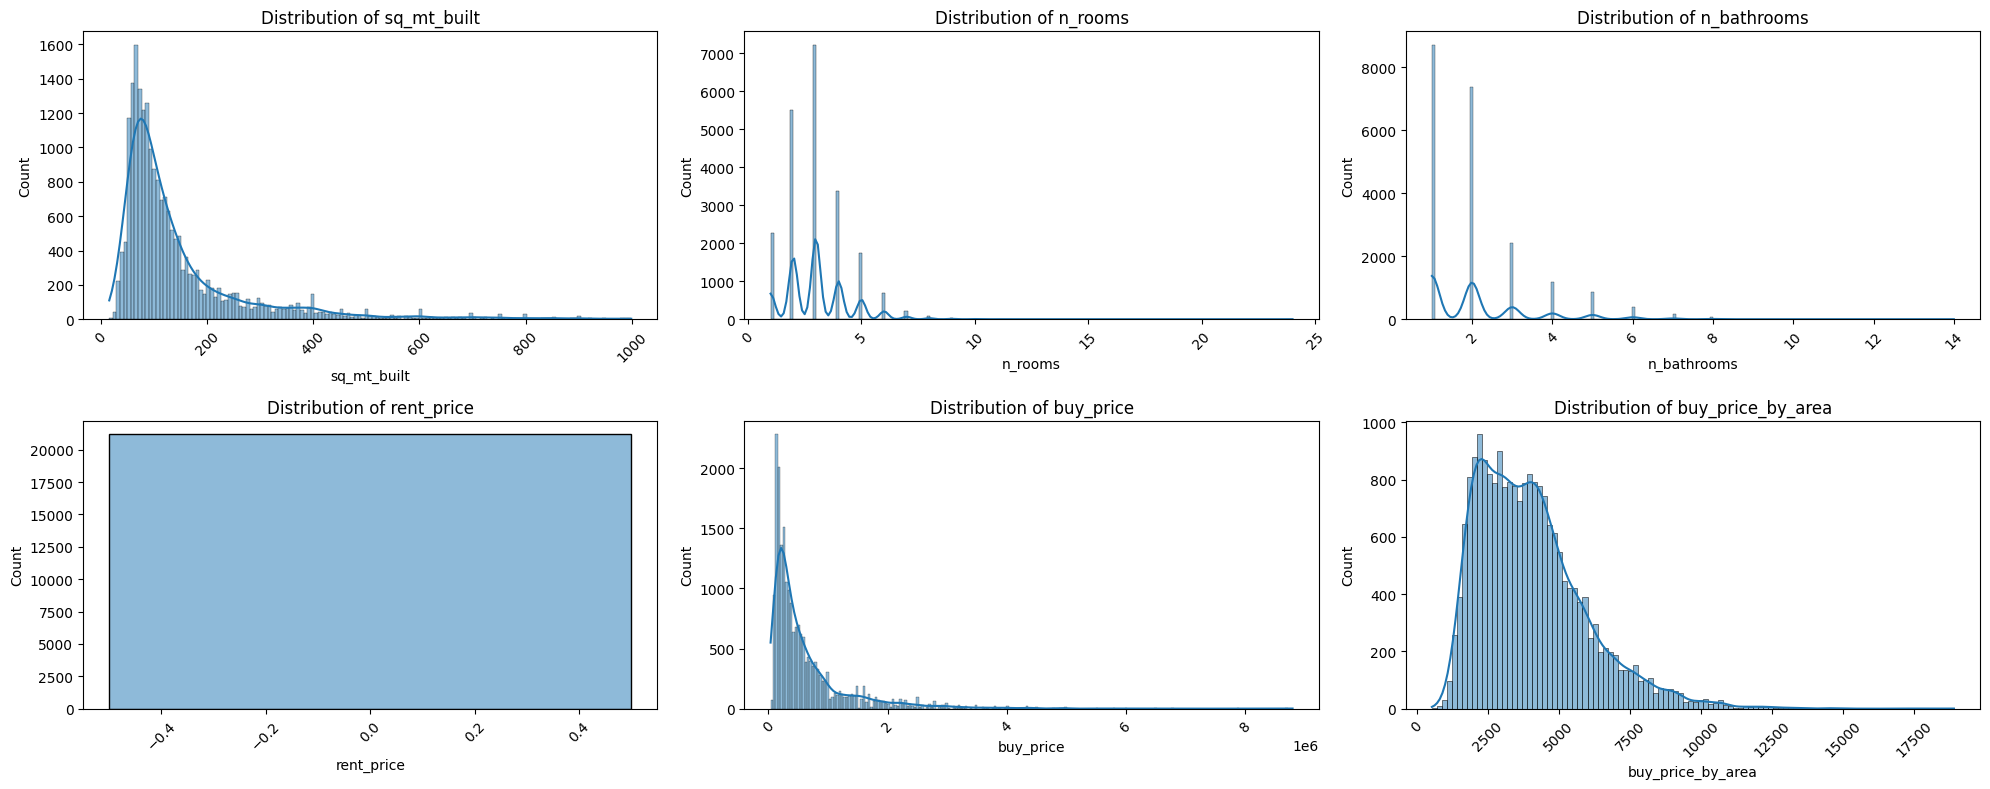

In [25]:
# Number of properties by district
plt.figure(figsize=(20,8))
for e, i in enumerate(df.columns[2:]):
    plt.subplot(2,3,e+1)
    sns.histplot(df[i], kde=True)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {i}')
    plt.tight_layout()

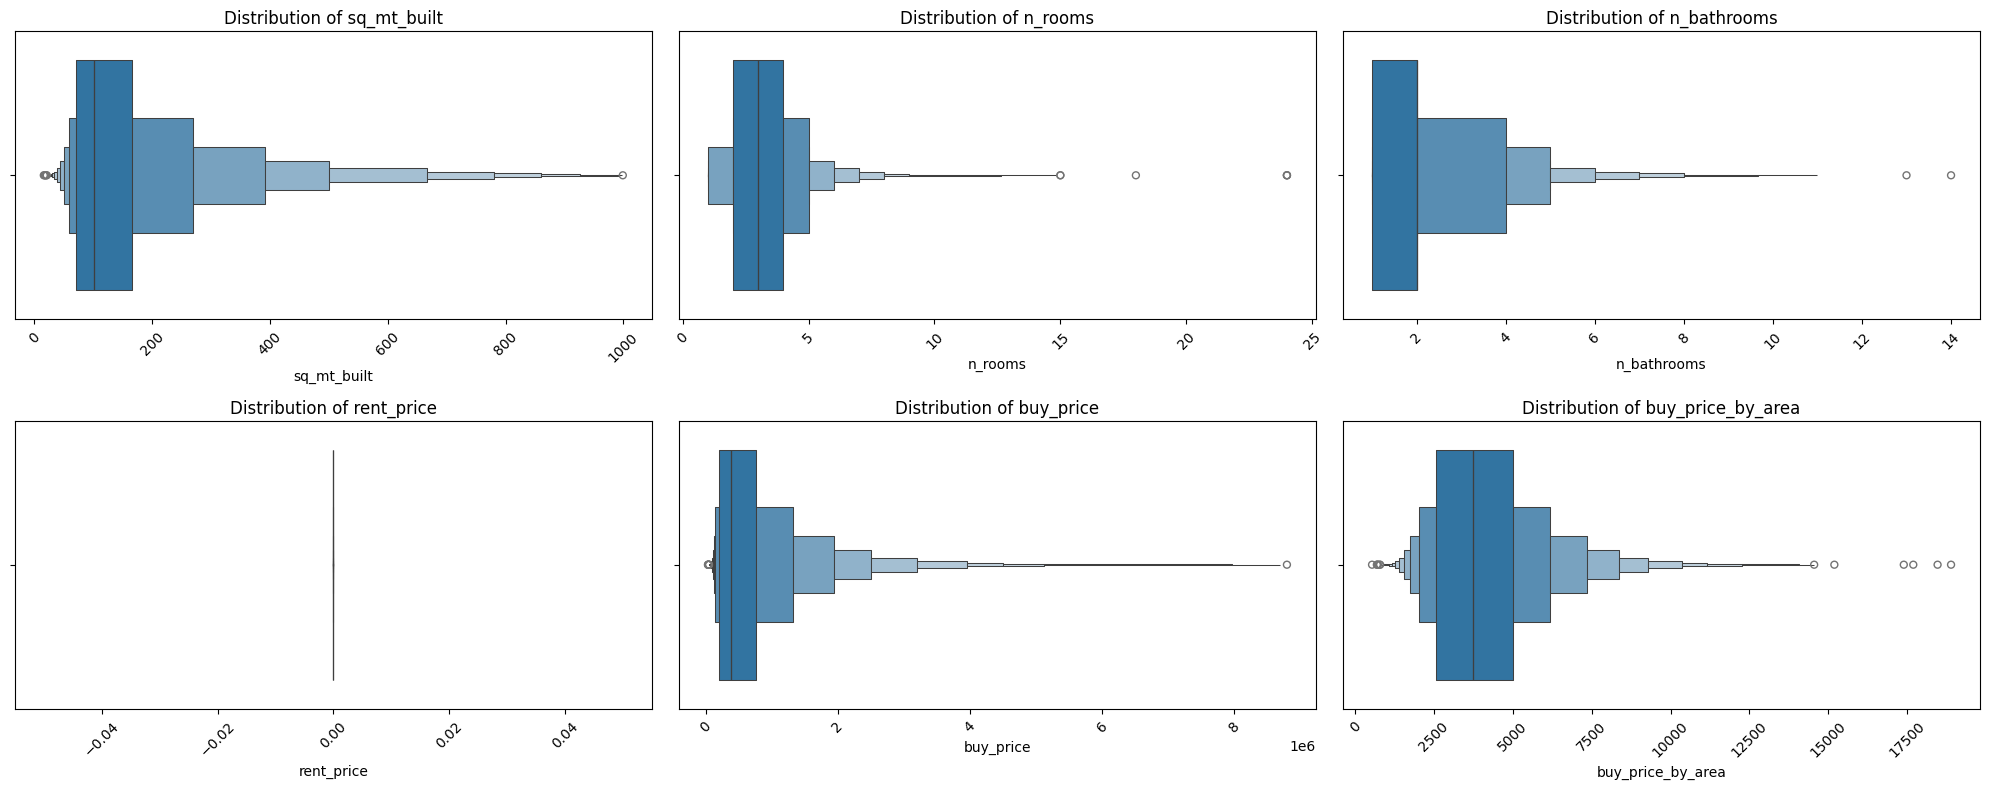

In [26]:
plt.figure(figsize=(20,8))
for e, i in enumerate(df.columns[2:]):
    plt.subplot(2,3,e+1)
    sns.boxenplot(x=df[i])
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {i}')
    plt.tight_layout()

In [27]:
px.bar(df['district'].value_counts(), title='Number of properties by district')

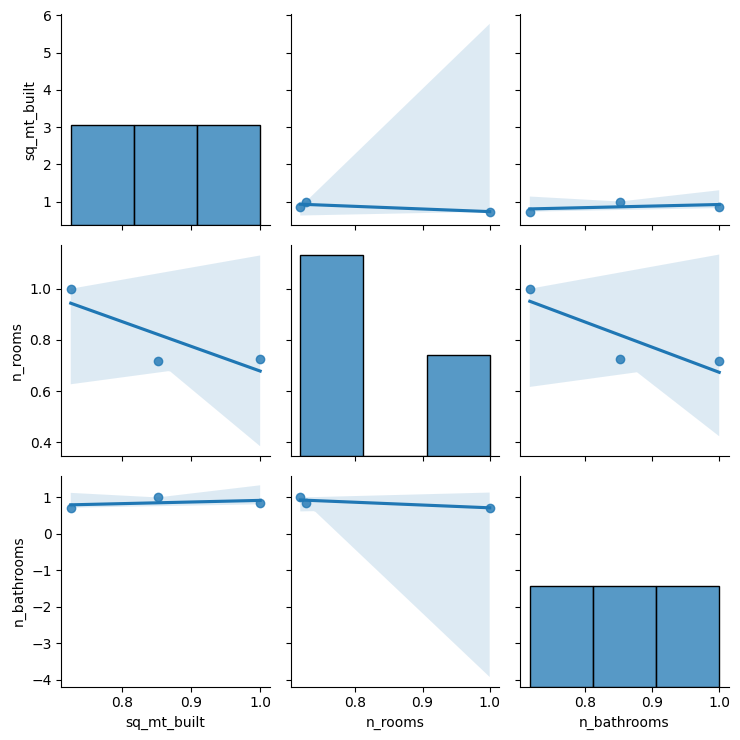

In [29]:
corr = df[['sq_mt_built', 'n_rooms', 'n_bathrooms']].corr()
sns.pairplot(corr, kind='reg')
plt.tight_layout()

Text(55.847222222222214, 0.5, 'Buy price')

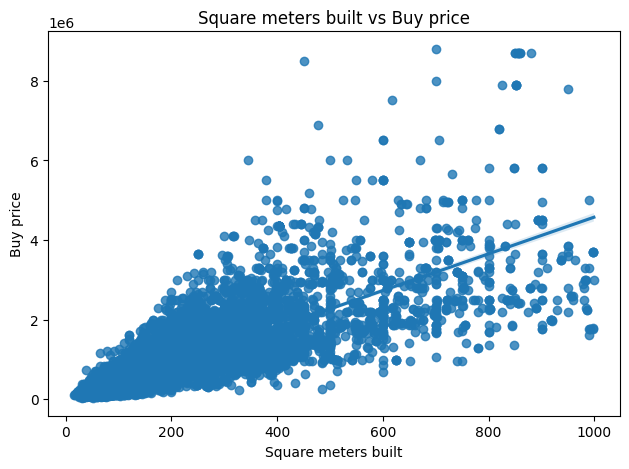

In [31]:
sns.regplot(x='sq_mt_built', y='buy_price', data=df)
plt.title('Square meters built vs Buy price')
plt.tight_layout()
plt.xlabel('Square meters built')
plt.ylabel('Buy price')

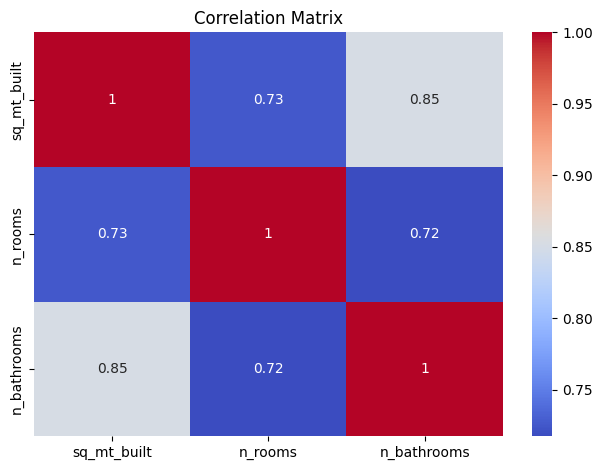

In [30]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()